## 프로젝트 규정

1. 본인의 코드와 과정을 다른 동료에게 설명할 수 있어야 합니다.
2. 최종 제출시 **작성한 코드를 제출**해야 합니다.
3. 제출 기회는 **하루 40회** 이며, 자정에 초기화 됩니다.
4. 정해진 마감 시간을 넘긴 후 제출된 점수는 인정되지 않습니다.

## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 공유킥보드 대여량 예측

공유킥보드 대여 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 공유킥보드를 대여하는지 예측하는 것이 목표입니다.

사람들이 공유킥보드를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 

가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 공유킥보드를 대여하지 않을 겁니다), 근무일(근무 시간에는 공유킥보드를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 공유킥보드 대여량을 예측해주세요. 

이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 공유킥보드 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

## 데이터 설명

  * **date** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **businessday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **season** - 계절. 봄, 여름, 가을, 겨울 순으로 표현합니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 맑은 날씨
    * 2: 약간의 안개와 구름이 끼어있는 날씨
    * 3: 약간의 눈, 비가 오거나 천둥
    * 4: 아주 많은 비가 오거나 우박
  * **humid** - 습도
  * **wind** - 풍속
  * **temp** - 온도
  * **sense_temp** - 체감 온도
  * **onetime** - 비회원의 공유킥보드 대여량.
  * **membership** - 멤버십에 가입한 회원의 공유킥보드 대여량.
  * **count** - 총 공유킥보드 대여랑. 비회원(onetime)과 멤버십 회원(membership)이 대여한 총 공유킥보드 대여량
  
## 프로젝트 구성
* 데이터 로드 (load data)
* 데이터 개요
* 데이터 전처리 (pre-processing)
* 모델 생성
* 검증
* 예측
* 제출 및 점수확인

## 환경설정

In [ ]:
project_name = # 프로젝트 이름
class_info = # 차수 정보
email =  # 이메일
name = # 이름 (ex. 홍길동)

## 모듈 설치 및 데이터 다운로드

In [ ]:
!pip install --upgrade mySUNI -q

import mySUNI
from mySUNI import cds, utils
print('===' * 15)
print(f'패키지버전: {mySUNI.__version__}')
print('===' * 15)

utils.set_plot_error('rmsle')

project = cds.Project(project_name, class_info, email)
project.edu_name = '데이터분석 2023'

print(f'프로젝트명: {project_name}\n차수 정보 : {class_info}\n이  메  일: {email}')
print('===' * 15)

# 다운로드 프로젝트 파일
cds.download_project(project_name, class_info, email)

# 이메일 설정 확인
if not project.email:
    raise print("[이메일이 누락되었습니다] 이메일을 설정해 주세요↑↑↑")


프로젝트: 공유 킥보드 대여량 예측
파일 목록

train.csv
- data/공유 킥보드 대여량 예측/train.csv

test.csv
- data/공유 킥보드 대여량 예측/test.csv

submission.csv
- data/공유 킥보드 대여량 예측/submission.csv



## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Data 경로 설정
DATA_DIR = 'data'

# 경고 무시
warnings.filterwarnings('ignore')

SEED=123

train = pd.read_csv(os.path.join(DATA_DIR, project_name, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, project_name, 'test.csv'))

2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.

In [ ]:
train.head()

date  businessday  holiday  season  weather  humid  wind  \
0  2011-01-01 00:00:00            0        0       1        1     81   0.0   
1  2011-01-01 01:00:00            0        0       1        1     80   0.0   
2  2011-01-01 02:00:00            0        0       1        1     80   0.0   
3  2011-01-01 03:00:00            0        0       1        1     75   0.0   
4  2011-01-01 04:00:00            0        0       1        1     75   0.0   

   temp  sense_temp  onetime  membership  count  
0  9.84      14.395        3          13     16  
1  9.02      13.635        8          32     40  
2  9.02      13.635        5          27     32  
3  9.84      14.395        3          10     13  
4  9.84      14.395        0           1      1

In [ ]:
train['date'] = pd.to_datetime(train['date'])

In [ ]:
test['date'] = pd.to_datetime(test['date'])

In [ ]:
train['hour'] = train['date'].dt.hour

In [ ]:
test['hour']  = test['date'].dt.hour

In [ ]:
train['day'] = train['date'].dt.day
train.tail()

date  businessday  holiday  season  weather  humid  \
10881 2012-12-19 19:00:00            1        0       4        1     50   
10882 2012-12-19 20:00:00            1        0       4        1     57   
10883 2012-12-19 21:00:00            1        0       4        1     61   
10884 2012-12-19 22:00:00            1        0       4        1     61   
10885 2012-12-19 23:00:00            1        0       4        1     66   

          wind   temp  sense_temp  onetime  membership  count  hour  day  
10881  26.0027  15.58      19.695        7         329    336    19   19  
10882  15.0013  14.76      17.425       10         231    241    20   19  
10883  15.0013  13.94      15.910        4         164    168    21   19  
10884   6.0032  13.94      17.425       12         117    129    22   19  
10885   8.9981  13.12      16.665        4          84     88    23   19

In [ ]:
# train.loc[train['day'] == 1, 'count'].sum()

103692

In [ ]:
test['day'] = test['date'].dt.day
test.tail()

date  businessday  holiday  season  weather  humid  \
6488 2012-12-31 19:00:00            1        0       1        2     60   
6489 2012-12-31 20:00:00            1        0       1        2     60   
6490 2012-12-31 21:00:00            1        0       1        1     60   
6491 2012-12-31 22:00:00            1        0       1        1     56   
6492 2012-12-31 23:00:00            1        0       1        1     65   

         wind   temp  sense_temp  hour  day  
6488  11.0014  10.66      12.880    19   31  
6489  11.0014  10.66      12.880    20   31  
6490  11.0014  10.66      12.880    21   31  
6491   8.9981  10.66      13.635    22   31  
6492   8.9981  10.66      13.635    23   31

In [ ]:
train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year
train['dayofweek'] = train['date'].dt.dayofweek
test['dayofweek'] = test['date'].dt.dayofweek

In [ ]:
test['month'] = test['date'].dt.month
test.tail()

date  businessday  holiday  season  weather  humid  \
6488 2012-12-31 19:00:00            1        0       1        2     60   
6489 2012-12-31 20:00:00            1        0       1        2     60   
6490 2012-12-31 21:00:00            1        0       1        1     60   
6491 2012-12-31 22:00:00            1        0       1        1     56   
6492 2012-12-31 23:00:00            1        0       1        1     65   

         wind   temp  sense_temp  hour  day  year  dayofweek  month  
6488  11.0014  10.66      12.880    19   31  2012          0     12  
6489  11.0014  10.66      12.880    20   31  2012          0     12  
6490  11.0014  10.66      12.880    21   31  2012          0     12  
6491   8.9981  10.66      13.635    22   31  2012          0     12  
6492   8.9981  10.66      13.635    23   31  2012          0     12

In [ ]:
train['month'] = train['date'].dt.month
train.tail()

date  businessday  holiday  season  weather  humid  \
10881 2012-12-19 19:00:00            1        0       4        1     50   
10882 2012-12-19 20:00:00            1        0       4        1     57   
10883 2012-12-19 21:00:00            1        0       4        1     61   
10884 2012-12-19 22:00:00            1        0       4        1     61   
10885 2012-12-19 23:00:00            1        0       4        1     66   

          wind   temp  sense_temp  onetime  membership  count  hour  day  \
10881  26.0027  15.58      19.695        7         329    336    19   19   
10882  15.0013  14.76      17.425       10         231    241    20   19   
10883  15.0013  13.94      15.910        4         164    168    21   19   
10884   6.0032  13.94      17.425       12         117    129    22   19   
10885   8.9981  13.12      16.665        4          84     88    23   19   

       year  dayofweek  month  
10881  2012          2     12  
10882  2012          2     12  
10883  2012          2     12  
10884  2012          2     12  
10885  2012          2     12

In [ ]:
# train['dayofyear'] = train['date'].dt.dayofyear
# test['dayofyear'] = test['date'].dt.dayofyear
# train['weekofyear'] = train['date'].dt.weekofyear
# test['weekofyear'] = test['date'].dt.weekofyear
# train['days_in_month'] = train['date'].dt.days_in_month
# test['days_in_month'] = test['date'].dt.days_in_month

In [ ]:
train = train.drop(['date'], axis=1)
train.tail()

businessday  holiday  season  weather  humid     wind   temp  \
10881            1        0       4        1     50  26.0027  15.58   
10882            1        0       4        1     57  15.0013  14.76   
10883            1        0       4        1     61  15.0013  13.94   
10884            1        0       4        1     61   6.0032  13.94   
10885            1        0       4        1     66   8.9981  13.12   

       sense_temp  onetime  membership  count  hour  day  year  dayofweek  \
10881      19.695        7         329    336    19   19  2012          2   
10882      17.425       10         231    241    20   19  2012          2   
10883      15.910        4         164    168    21   19  2012          2   
10884      17.425       12         117    129    22   19  2012          2   
10885      16.665        4          84     88    23   19  2012          2   

       month  
10881     12  
10882     12  
10883     12  
10884     12  
10885     12

In [ ]:
test = test.drop(['date'], axis=1)
test.tail()

businessday  holiday  season  weather  humid     wind   temp  \
6488            1        0       1        2     60  11.0014  10.66   
6489            1        0       1        2     60  11.0014  10.66   
6490            1        0       1        1     60  11.0014  10.66   
6491            1        0       1        1     56   8.9981  10.66   
6492            1        0       1        1     65   8.9981  10.66   

      sense_temp  hour  day  year  dayofweek  month  
6488      12.880    19   31  2012          0     12  
6489      12.880    20   31  2012          0     12  
6490      12.880    21   31  2012          0     12  
6491      13.635    22   31  2012          0     12  
6492      13.635    23   31  2012          0     12

In [ ]:
train.head()

businessday  holiday  season  weather  humid  wind  temp  sense_temp  \
0            0        0       1        1     81   0.0  9.84      14.395   
1            0        0       1        1     80   0.0  9.02      13.635   
2            0        0       1        1     80   0.0  9.02      13.635   
3            0        0       1        1     75   0.0  9.84      14.395   
4            0        0       1        1     75   0.0  9.84      14.395   

   onetime  membership  count  hour  day  year  dayofweek  month  
0        3          13     16     0    1  2011          5      1  
1        8          32     40     1    1  2011          5      1  
2        5          27     32     2    1  2011          5      1  
3        3          10     13     3    1  2011          5      1  
4        0           1      1     4    1  2011          5      1

In [ ]:
# n = train.loc[train['wind']==0].shape[0]
# std = (train['wind'].sum()/(train['wind'].shape[0]-n))
# m = test.loc[test['wind']==0].shape[0]
# std2 = (test['wind'].sum()/(test['wind'].shape[0]-m))

# train.loc[train['wind']==0,'wind']=std
# test.loc[test['wind']==0,'wind']=std2
# train.head()

businessday  holiday  season  weather  humid       wind  temp  sense_temp  \
0            0        0       1        1     81  14.554917  9.84      14.395   
1            0        0       1        1     80  14.554917  9.02      13.635   
2            0        0       1        1     80  14.554917  9.02      13.635   
3            0        0       1        1     75  14.554917  9.84      14.395   
4            0        0       1        1     75  14.554917  9.84      14.395   

   onetime  membership  count  hour  day  year  dayofweek  month  
0        3          13     16     0    1  2011          5      1  
1        8          32     40     1    1  2011          5      1  
2        5          27     32     2    1  2011          5      1  
3        3          10     13     3    1  2011          5      1  
4        0           1      1     4    1  2011          5      1

In [ ]:
features = [
    # 'date', 
    'businessday',
    'holiday',  #
    'season', 
    'weather', 
    'humid', 
    'wind',  #
    'temp', 
    # 'sense_temp', #### 주석처리하기
    'hour',
    'day',
    'month',
    'year',
    'dayofweek',
    # 'dayofyear',
    # 'weekofyear',
    # 'days_in_month',
]

In [ ]:
x = train[features]
x.head()

businessday  holiday  season  weather  humid  wind  temp  hour  day  month  \
0            0        0       1        1     81   0.0  9.84     0    1      1   
1            0        0       1        1     80   0.0  9.02     1    1      1   
2            0        0       1        1     80   0.0  9.02     2    1      1   
3            0        0       1        1     75   0.0  9.84     3    1      1   
4            0        0       1        1     75   0.0  9.84     4    1      1   

   year  dayofweek  
0  2011          5  
1  2011          5  
2  2011          5  
3  2011          5  
4  2011          5

In [ ]:
y = np.log1p(train['count']) # y = np.log1p(train['charges'])
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

## 데이터 설명

  * **date** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **businessday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **season** - 계절. 봄, 여름, 가을, 겨울 순으로 표현합니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 맑은 날씨
    * 2: 약간의 안개와 구름이 끼어있는 날씨
    * 3: 약간의 눈, 비가 오거나 천둥
    * 4: 아주 많은 비가 오거나 우박
  * **humid** - 습도
  * **wind** - 풍속
  * **temp** - 온도
  * **sense_temp** - 체감 온도
  * **onetime** - 비회원의 공유킥보드 대여량.
  * **membership** - 멤버십에 가입한 회원의 공유킥보드 대여량.
  * **count** - 총 공유킥보드 대여랑. 비회원(onetime)과 멤버십 회원(membership)이 대여한 총 공유킥보드 대여량

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 123

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=SEED)

In [ ]:
# one = train[['onetime','membership']]
# one_train, one_valid, oney_train, oney_valid = train_test_split(one,y,random_state=SEED)
# mem_train, mem_valid, memy_train, memy_valid = train_test_split(m,y,random_state=SEED)

In [ ]:
# from xgboost import XGBRegressor, XGBClassifier
# SEED = 100
# xgb2 = XGBRegressor(random_state=SEED, learning_rate=0.005, n_estimators=2000, subsample=0.8, max_depth=5, n_jobs=1)
# xgb2.fit(one_train, oney_train)
# xgb_pred2 = xgb2.predict(one_valid)

[07:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[07:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


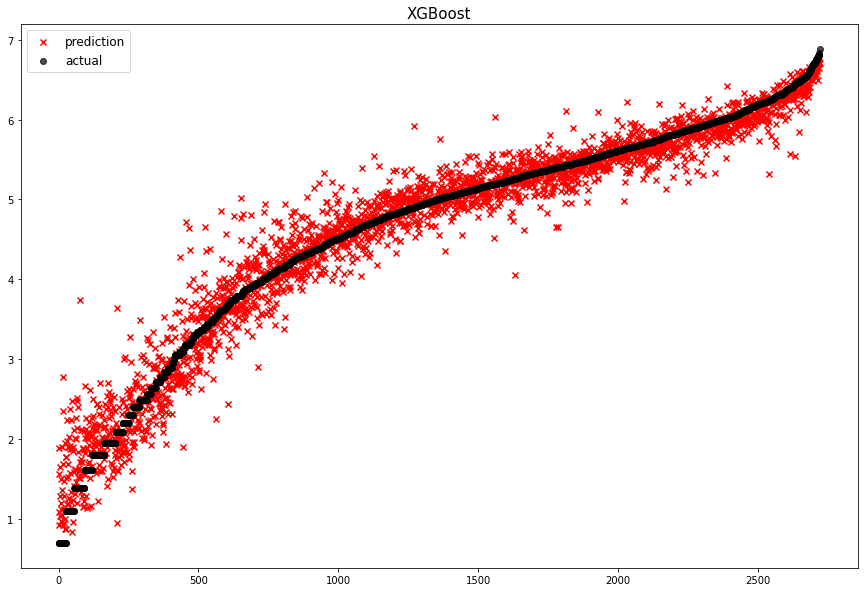

     model     error
0  XGBoost  0.078516


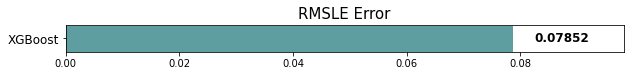

In [ ]:
from xgboost import XGBRegressor, XGBClassifier
SEED = 150
xgb = XGBRegressor(random_state=SEED, learning_rate=0.005, n_estimators=2000, subsample=0.8, max_depth=5, n_jobs=-1)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_valid)
utils.plot_error('XGBoost', y_valid, xgb_pred)

In [ ]:
# 참고 코드
from sklearn.metrics import mean_squared_log_error
RMSLE = lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, y_pred))
# RMSLE(y_valid, pred)
RMSLE(np.expm1(y_valid), np.expm1(xgb_pred))

0.2883034411283281

In [ ]:
# your_answer = 0.7*xgb.predict(test[features]) + 0.3*(xgb2.predict(test[features]))#xgb.predict(test[features])# test.csv를 예측한 결과 대입 = # test.csv를 예측한 결과 대입
# your_answer = np.expm1(your_answer)
your_answer = xgb.predict(test[features])# test.csv를 예측한 결과 대입 = # test.csv를 예측한 결과 대입
your_answer = np.expm1(your_answer)

In [ ]:
# 값에 오류가 없는지 확인
utils.check_error(your_answer)

[통과] 문제가 발견되지 않았습니다.


## 시각화 샘플 코드

In [ ]:
# 시각화 샘플 코드
# utils.plot_error('Your Model', y_valid, pred)

In [ ]:
# 시각화 차트 초기화
# utils.clear_error()

# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

- 전체 점수는 [평가시스템](http://manage.jaen.kr)에서 확인할 수 있습니다.
    - 프로젝트 > 공유 킥보드 대여량 예측 > 리더보드 > 같은 반 리더보드
    - 아이디: `본인(회사) 이메일`
    - 비번: `강사에게 문의`

아래 Cell을 실행하여 예측 결과 업데이트

In [ ]:
# 값에 오류가 없는지 확인
utils.check_error(your_answer)

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = your_answer
display(submission)

# 제출
project.email = email
project.submit(submission)

[통과] 문제가 발견되지 않았습니다.


datetime       count
0     2011-01-20 00:00:00   11.159720
1     2011-01-20 01:00:00    5.352424
2     2011-01-20 02:00:00    3.013793
3     2011-01-20 03:00:00    1.856532
4     2011-01-20 04:00:00    1.733703
...                   ...         ...
6488  2012-12-31 19:00:00  231.881912
6489  2012-12-31 20:00:00  168.093719
6490  2012-12-31 21:00:00  137.687515
6491  2012-12-31 22:00:00  107.301849
6492  2012-12-31 23:00:00   61.027733

[6493 rows x 2 columns]

파일을 저장하였습니다. 파일명: submission-07-34-19.csv
제출 여부 :success
오늘 제출 횟수 : 12
제출 결과:0.39905
